### DS sacado de: https://www.kaggle.com/uciml/zoo-animal-classification

Este DS consiste en 101 animales de un zoológico. Hay 16 features para describir a los animales y cada animal ya está "etiquetado"/
clasificado en 7 distintas clases: Mammal, Bird, Reptile, Fish, Amphibian, Bug e Invertebrate.
De esta manera, mediante distintas features que nosotros eligamos y creamos convenientes podremos predecir la 
clasificación de un animal (esté o no en este zoológico, ya que puede ser uno nuevo). 

Tenemos 2 csvs:

    1-zoo.csv. Este contiene todos los features de los animales:
        animal_name: Unique for each instance
        hair: Boolean
        feathers: Boolean
        eggs: Boolean
        milk: Boolean
        airborne: Boolean
        aquatic: Boolean
        predator: Boolean
        toothed: Boolean
        backbone: Boolean
        breathes: Boolean
        venomous: Boolean
        fins: Boolean
        legs: Numeric (set of values: {0,2,4,5,6,8})
        tail: Boolean
        domestic: Boolean
        catsize: Boolean
        class_type: Numeric (integer values in range [1,7])


    2-class.csv: Este describe la clase del csv anterior. 
        Class_Number: Numeric (integer values in range [1,7])
        NumberOfAnimalSpeciesIn_Class: Numeric
        Class_Type: character -- The actual word description of the class
        Animal_Names: character -- The list of the animals that fall in the category of the class

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
#LIbrerias de visualizacion:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
#Carga de DS con los animales
DF_Animals = pd.read_csv("DataSourceTL3/zoo.csv") #Armamos un Data Frame con nuestros datos de entrada.
#URL para descargar el CSV: https://www.aprendemachinelearning.com/articulos_ml/
DF_Animals.shape #Vemos sus dimensiones (tiene 161 Filas/registros x 8 columnas/features)

(101, 18)

In [20]:
#Cargamos el DS con las clases (nombres):
DF_Clases = pd.read_csv("DataSourceTL3/class.csv")
DF_Clases.shape

(7, 4)

In [21]:
DF_Clases

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [22]:
DF_Animals.head(20)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


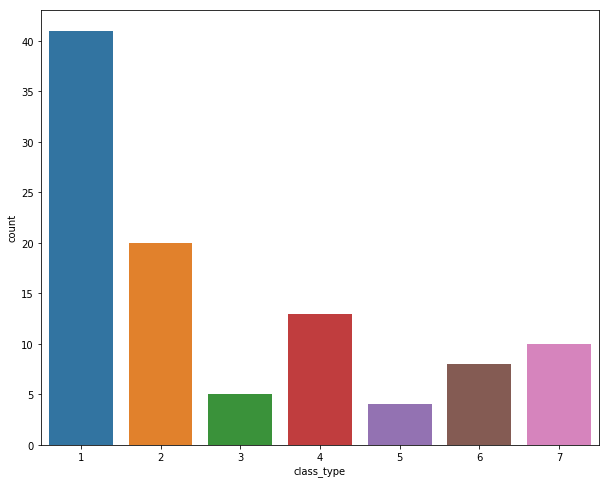

In [23]:
#Vemos la cantidad de clases que hay... y vemos que mayoritariamente son de la clase 1 (mamíferos):
plt.figure(figsize = (10,8))
sns.countplot(DF_Animals.class_type)
plt.show()

In [24]:
#Vamos a considerar TODAS las variables numéricas y booleanas (1 o 0) en nuestro DS para predecir la variable "class_type".
#Por esto sacamos del DF a la variable animal_name que no nos interesa y tambien nuestra variable target (class_type):
x_data = DF_Animals.drop(["animal_name","class_type"],axis=1)

#Y acá colocamos nuestra variable class_type que queremos predecir:
y = DF_Animals["class_type"]

In [25]:
#Entrenamiento... separamos 20% test y 80% para entrenamiento:
X_train,X_test,y_train,y_test = train_test_split(x_data,y,test_size=0.2,random_state=4)

In [26]:
#seleccionar el K óptimo para utilizar nuestro algoritmo. Para esto entrenamos al algoritmo K veces 
#y nos quedamos con el modelo que nos dé la mejor predicción (el mejor score).

#Como vimos previamente, dependiendo del valor de K el algoritmo se compartaba de mejor o peor manera. 
#Vamos a realizar un barrido para los distintos valores de K (del 1 al 25).
#Y así, para cada uno de estos valores de K vamos a entrenar al algoritmo y así vamos a obtener la exactitud/score del algoritmo:

k_range = range(1,25) #Valores de K (1-25)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k) #Llamamos al modelo de clasificación (KNN) y le pasamos cada valor de K. 
        knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K con los x_train e Y_train que elegimos previamente.
        y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test... lo mismo que haciamos con RL.
        scores[k] = metrics.accuracy_score(y_test,y_pred) #Después calculamos y guardamos el score de esa predicción con ese valor de K.
        scores_list.append(scores[k]) #Y esa predicción la metemos en una lista.

Text(0,0.5,'Testing Accuracy')

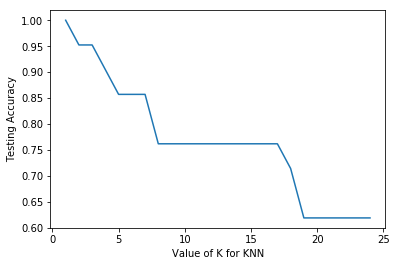

In [27]:
#Ahora graficamos y vemos la relación entre los K y la exactitud/score del algoritmo:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [28]:
#Elegimos un K=2 ya que vemos que allí la eficiencia es del 0,95% (Alta) y nuestro algoritmo predecirá bien.

### Entrenamos al algoritmo de KNN con un K óptimo (K=2)

In [29]:
k_Optimo=2
knn = KNeighborsClassifier(n_neighbors=k_Optimo) #Le asignamos este k=2.
knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K=2 con los x_train
#e Y_train que elegimos previamente.
y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test.
score = metrics.accuracy_score(y_test,y_pred) #Cálculo del score para k=2

print("Precisión de KNN con K optimo:",score) #printeamos el score.

Precisión de KNN con K optimo: 0.9523809523809523


In [30]:
#La Accuracy del modelo es el número total de predicciones correctas dividido por el número total de predicciones. 
 ##--> Accuracy = predicciones correctas / número total de predicciones 
    
#Ahora vamos a realizar predicciones con este K óptimo...

#Creamos un diccionario viendo el DF_Clases vemos la columna "Class_Number" y "Class_Type", y de acuerdo a su clase le ponemos 
#el tipo correspondiente en dicho diccionario dependiendo su número:
dicClasses = {1:'Mammal',2:'Bird',3:'Reptile',4:'Fish',5:'Amphibian',6:'Bug',7:'Invertebrate'}

#Antes estabamos acostumbrados a usar el x_test para predecir con esto... ahora vamos a tomar 
#valores que NO estan en nuestro DS ni en nuestro x_test para predecir el tipo de planta:

#hair	feathers	eggs	milk	airborne	aquatic	predator	toothed	backbone	breathes	venomous	fins	legs	tail	domestic	catsize
#Ejemplo de un oso (es categoría 1):
#    1	0	0	1	0	0	1	1	1	1	0	0	4	0	0	1
#Ejemplo de un pollo (es categoría 2):
#    0	1	1	0	1	0	0	0	1	1	0	0	2	1	1	0

x_new = [   [1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1],   #Oso.
            [0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0],   #Pollo.
            [0,1,1,0,0,0,1,1,1,1,0,0,4,0,1,1],   #Animal random.
        ]

#Este X_new son valores que nosotros le ponemos. En el primer vector tenemos como ejemplo el oso (que nos debe decir que es categoría 1), 
#en el 2do vector tenemos un pollo (Categoría 2) y en el 3ro un animal inventado. 

#De esta manera le pasamos animales (2 que ya sabemos su categoría para comprobar su funcionamiento y otro animal que NO lo sabemos)
#y el algoritmo ya previamente entrenado predecirá cual planta piensa que es:
y_predict = knn.predict(x_new)

print(dicClasses[y_predict[0]]) #La 1era nos dice que es Mammal.
print(dicClasses[y_predict[1]]) #La 2da nos dice que es Bird.
print(dicClasses[y_predict[2]]) #La 3ra nos dice que es Reptile.

Mammal
Bird
Reptile


### Simplemente como prueba predeciremos con un K NO óptimo (20):

In [32]:
k_NO_Optimo=20
knn = KNeighborsClassifier(n_neighbors=k_NO_Optimo) #Le asignamos este k=20.
knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K=2 con los x_train e Y_train que elegimos previamente.
y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test.
score = metrics.accuracy_score(y_test,y_pred) #Cálculo del score para k=20

print("Precisión de KNN con K NO optimo:",score) #printeamos el score.

Precisión de KNN con K NO optimo: 0.6190476190476191


In [33]:
#Ahora predecimos pero con nuestro modelo KNN NO fiable.
#dicClasses y x_new ya los definimos anteriormente y estos valores no cambian.

y_predict = knn.predict(x_new)

print(dicClasses[y_predict[0]]) #La 1era nos dice que es Mammal.
print(dicClasses[y_predict[1]]) #La 2da nos dice que es Bird.
print(dicClasses[y_predict[2]]) #La 3ra nos dice que es Mammal (distinto al anterior con K óptimo)

Mammal
Bird
Mammal


In [34]:
#Para el último caso vimos que cambió su predicción a un tipo "Mammal", este valor seguramente es incorrecto ya que nuestro
#K es de 20 (donde nuestro algoritmo no es para nada eficiente). Con k=20 nuestro algoritmo no es fiable, predice MAL.

#Conclusión: A KNN le pasamos nuestro algoritmo ya etiquetado y en base a esto encontramos el mejor valor de K
#para que pueda realizar la clasificación lo mejor posible. Si para nuestro K tenemos un buen score entonces nuestro algoritmos
#predecirá bien y podremos utilizar este valor de K; en caso contrario (al elegir un K NO óptimo) nuestro algoritmo no predecirá para nada bien. 